# Chargement des packages

In [ ]:

# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

# Base de données Diabetes

La base de données "Diabetes" est disponible sur [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Cette base de données contient des informations sur des patientes féminines âgées d'au moins 21 ans et provenant de populations amérindiennes Pima, qui ont été examinées pour déterminer s'ils avaient un diabète de type 2. Les caractéristiques incluent des mesures telles que la taille, le poids, l'âge, le nombre de grossesses, la pression artérielle, etc.

## Contenu de la base de données

La base de données contient les colonnes suivantes :

- `Pregnancies` : nombre de grossesses
- `Glucose` : concentration de glucose dans le plasma sanguin à jeun
- `BloodPressure` : pression artérielle diastolique (mm Hg)
- `SkinThickness` : épaisseur du pli cutané tricipital (mm)
- `Insulin` : taux d'insuline sérique de 2 heures (mu U/ml)
- `BMI` : indice de masse corporelle (kg/m²)
- `DiabetesPedigreeFunction` : fonction pedigree du diabète
- `Age` : âge (années)
- `Outcome` : variable cible indiquant si le patient est diabétique (0 = non diabétique, 1 = diabétique)

## Objectif de l'analyse

L'objectif de cette analyse est de construire un modèle de classification pour prédire si une patiente a un diabète de type 2 en fonction de ses caractéristiques cliniques. Cette base de données sera divisée en ensembles d'apprentissage et de test pour entraîner et évaluer les performances du modèle.


# Importation et nettoyage des données

In [4]:
# Chargement des données
diabete=pd.read_csv("diabetes.csv")

In [5]:

diabete.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Affichage des informations générales sur le DataFrame
diabete.info()

## Description des données

In [6]:
# Affichage des statistiques descriptives du DataFrame
diabete.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(diabete.nunique())


In [7]:
# Affichage du nombre de valeurs manquantes pour chaque variable
print(diabete.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


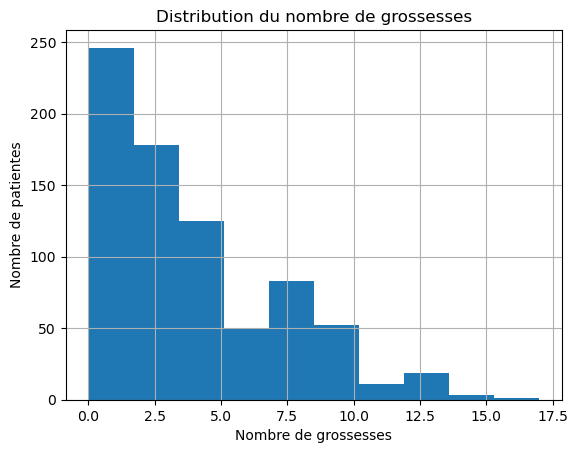

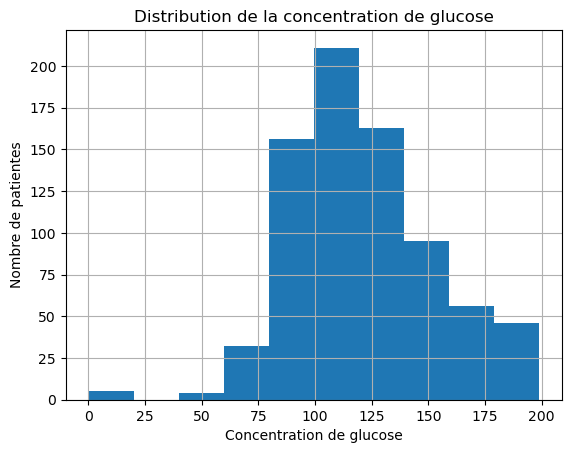

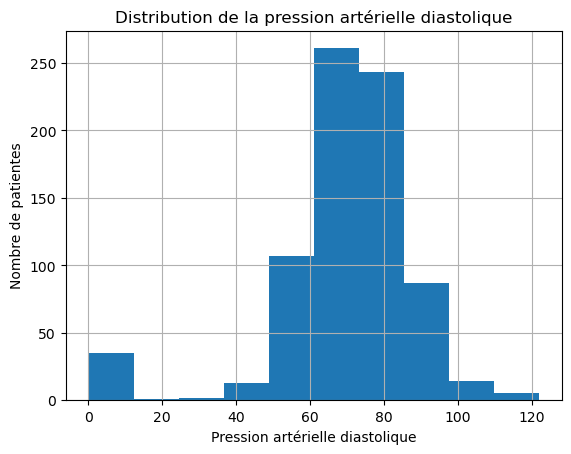

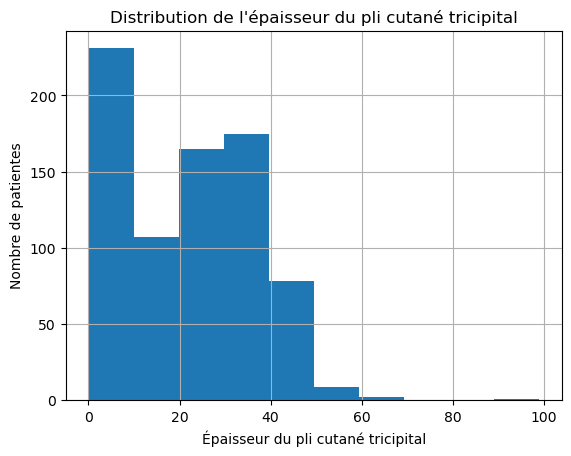

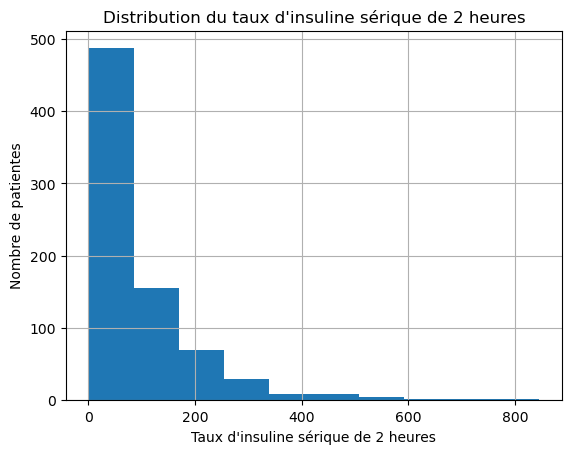

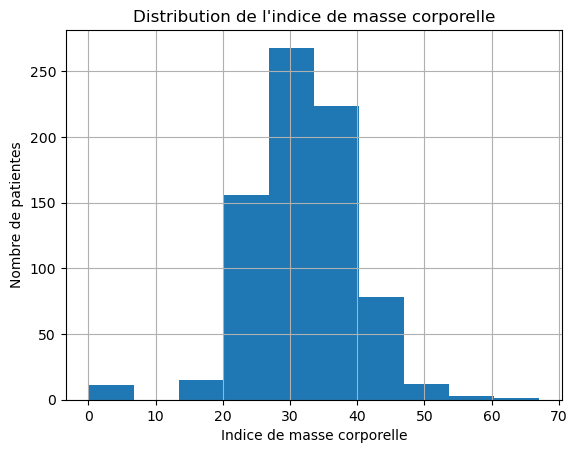

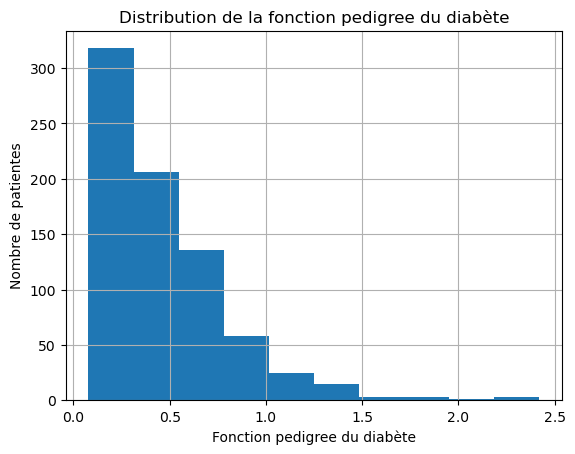

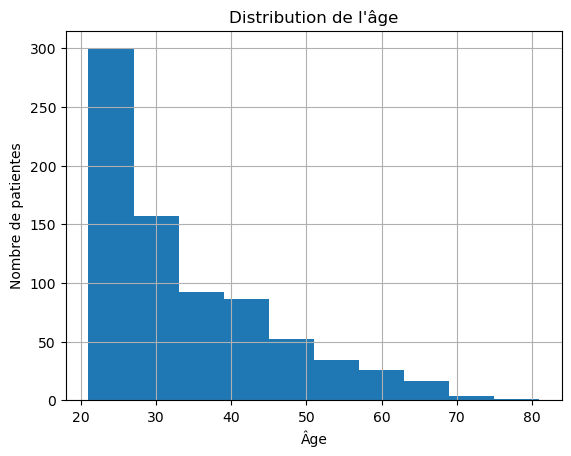

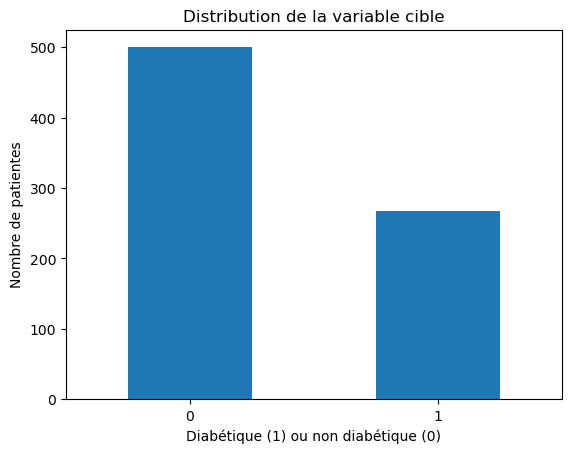

In [8]:

# Histogramme de la variable 'Pregnancies'
diabete['Pregnancies'].hist()
plt.title('Distribution du nombre de grossesses')
plt.xlabel('Nombre de grossesses')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Glucose'
diabete['Glucose'].hist()
plt.title('Distribution de la concentration de glucose')
plt.xlabel('Concentration de glucose')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BloodPressure'
diabete['BloodPressure'].hist()
plt.title('Distribution de la pression artérielle diastolique')
plt.xlabel('Pression artérielle diastolique')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'SkinThickness'
diabete['SkinThickness'].hist()
plt.title('Distribution de l\'épaisseur du pli cutané tricipital')
plt.xlabel('Épaisseur du pli cutané tricipital')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Insulin'
diabete['Insulin'].hist()
plt.title('Distribution du taux d\'insuline sérique de 2 heures')
plt.xlabel('Taux d\'insuline sérique de 2 heures')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BMI'
diabete['BMI'].hist()
plt.title('Distribution de l\'indice de masse corporelle')
plt.xlabel('Indice de masse corporelle')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'DiabetesPedigreeFunction'
diabete['DiabetesPedigreeFunction'].hist()
plt.title('Distribution de la fonction pedigree du diabète')
plt.xlabel('Fonction pedigree du diabète')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Age'
diabete['Age'].hist()
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de patientes')
plt.show()

# Diagramme en barres de la variable 'Outcome'
diabete['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible')
plt.xlabel('Diabétique (1) ou non diabétique (0)')
plt.ylabel('Nombre de patientes')
plt.xticks(rotation=0)
plt.show()

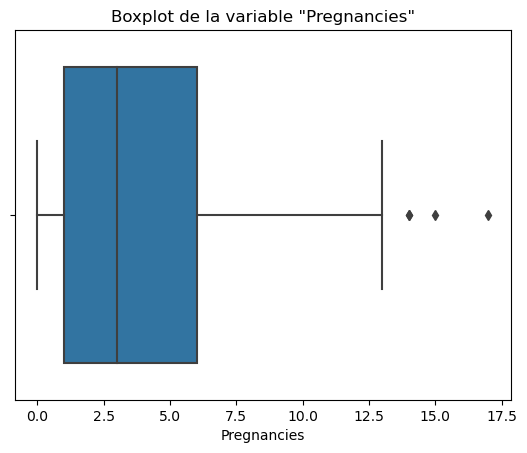

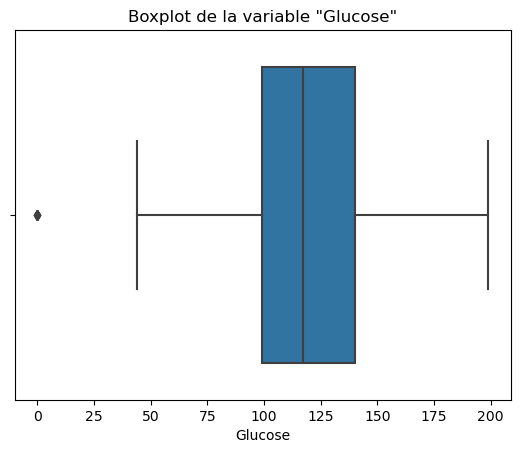

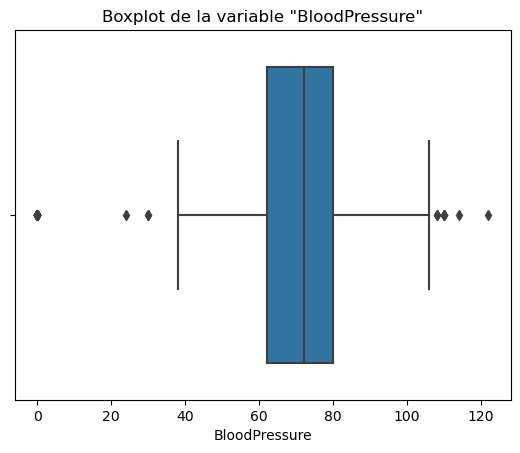

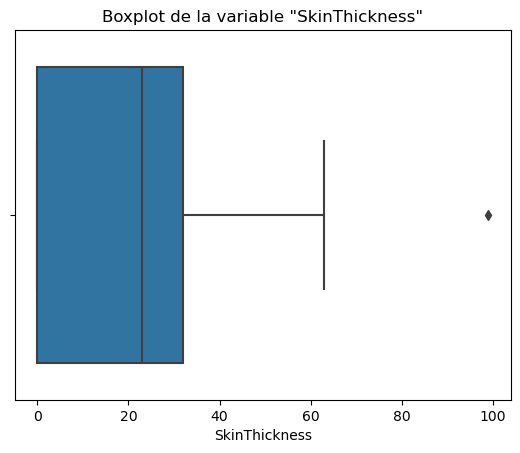

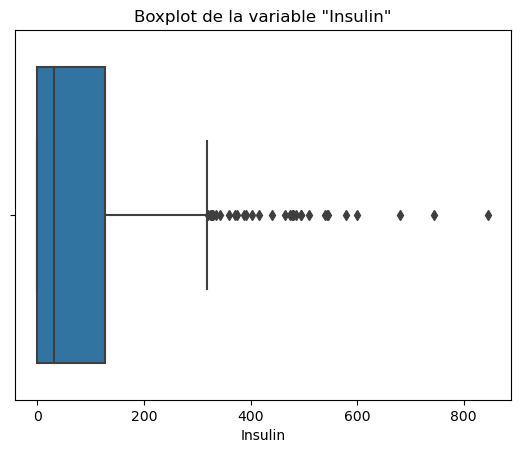

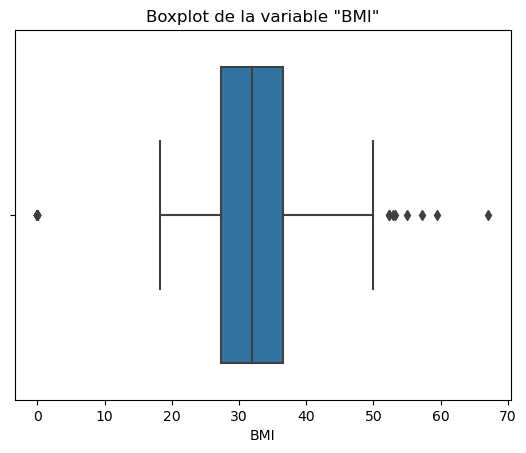

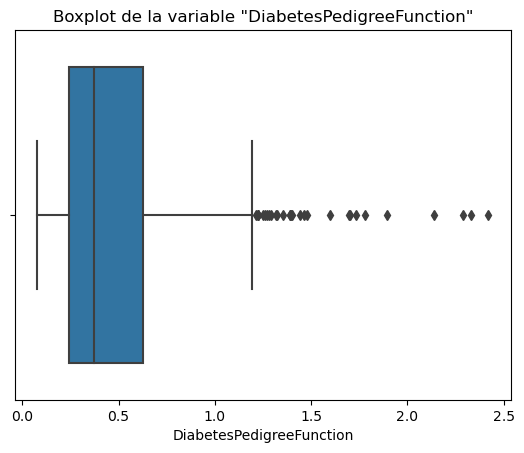

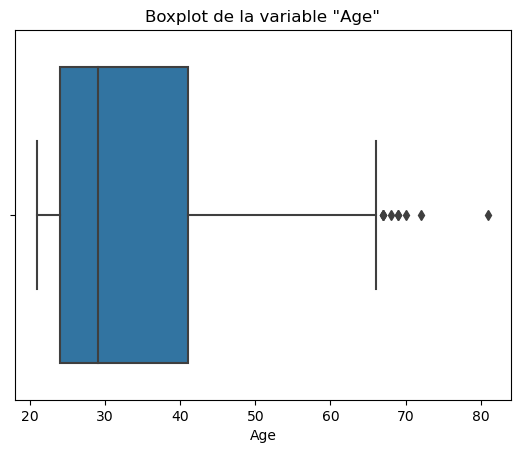

In [9]:
# Génération des boxplots pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(x=diabete[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

## Analyse des liaisons entre les variables

In [ ]:
# Génération du pairplot
sns.pairplot(data=diabete, hue='Outcome', diag_kind='hist')
plt.suptitle('Pairplot des variables numériques')
plt.show()

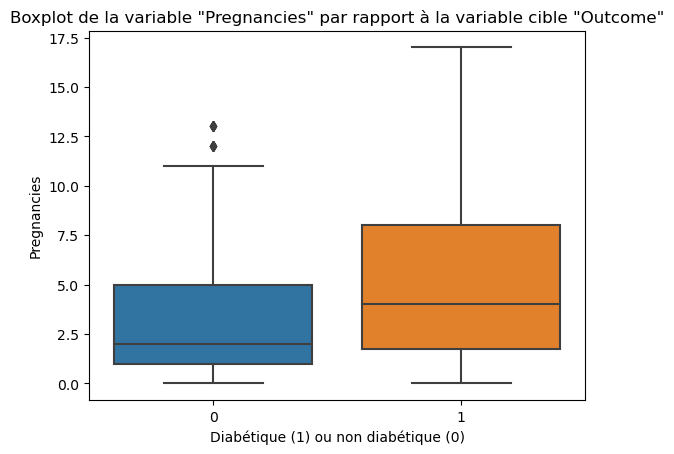

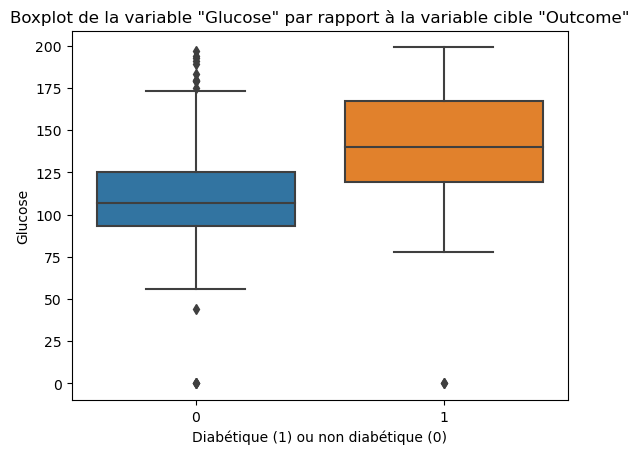

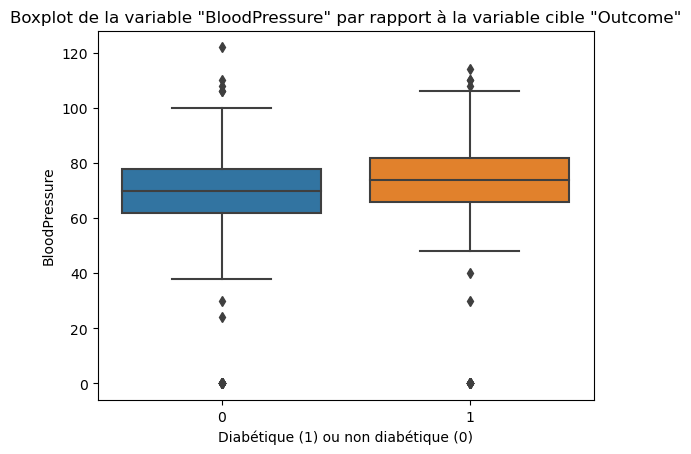

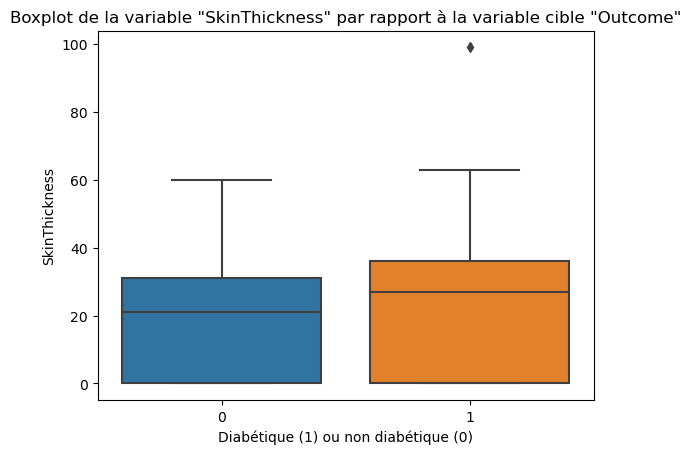

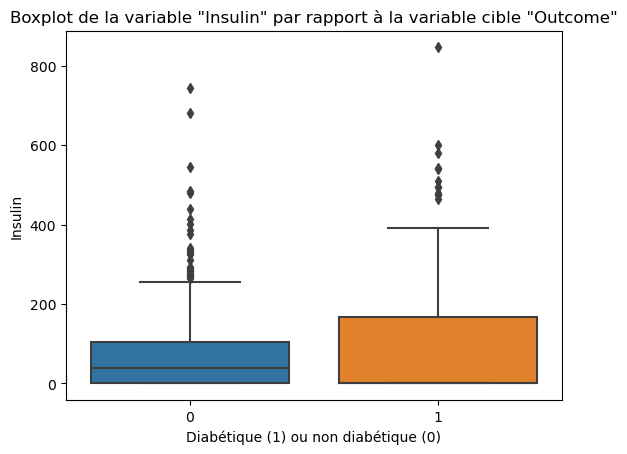

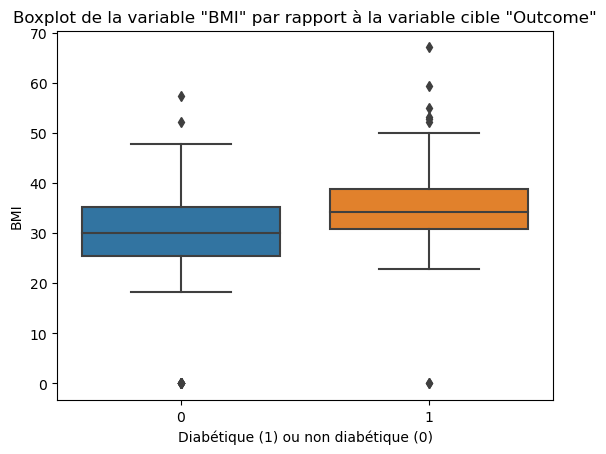

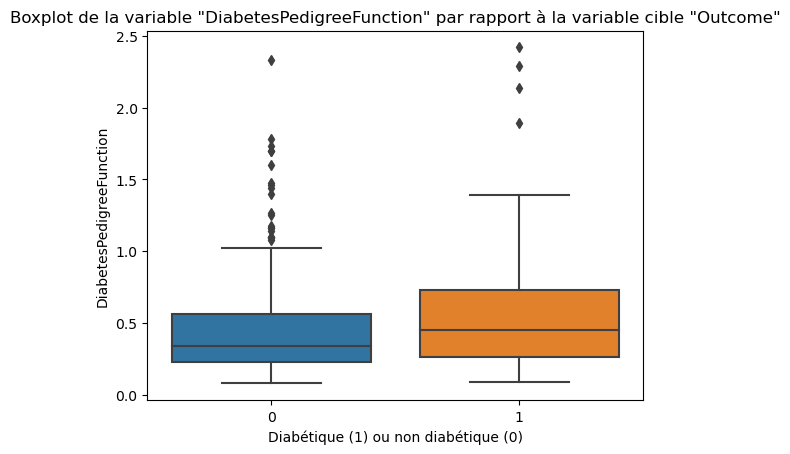

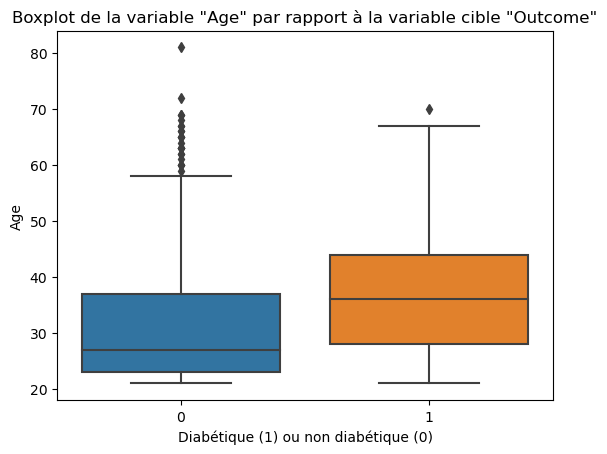

In [10]:
# Génération des boxplots bivariés pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(data=diabete, x='Outcome', y=col)
    plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "Outcome"')
    plt.xlabel('Diabétique (1) ou non diabétique (0)')
    plt.ylabel(col)
    plt.show()

In [11]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

from scipy.stats import kruskal
p_values = []
for col in num_vars:
    h, pval = kruskal(diabete[col][diabete['Outcome']==0], diabete[col][diabete['Outcome']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': num_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)



                               P-value Significative
Variable                                            
Pregnancies               3.741498e-08           Oui
Glucose                   1.198015e-39           Oui
BloodPressure             7.553110e-05           Oui
SkinThickness             1.295554e-02           Oui
Insulin                   6.563377e-02           Non
BMI                       9.716371e-18           Oui
DiabetesPedigreeFunction  1.195553e-06           Oui
Age                       1.140509e-17           Oui


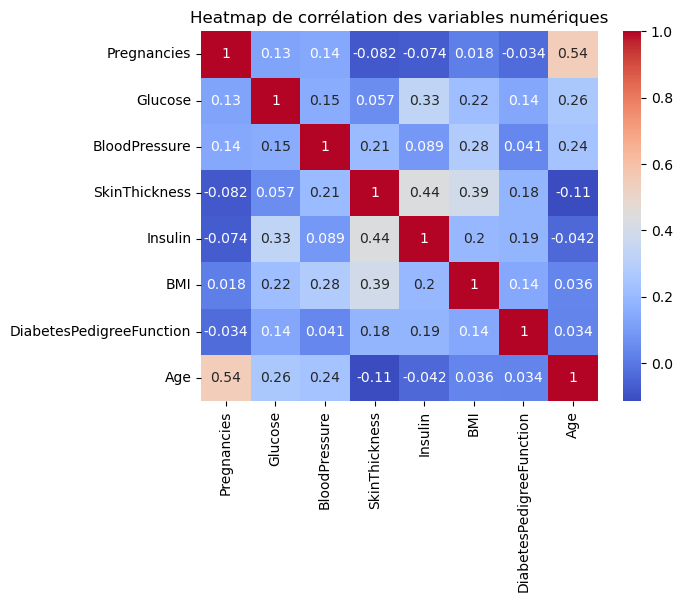

In [12]:
# Sélection des variables numériques
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_num = diabete[num_vars]

# Génération de la heatmap de corrélation
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

# Modélisation avec Adaboost

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Selection des variables

In [14]:
# Séparation des données en variables prédictives et variable cible
X = diabete.drop('Outcome', axis=1)#Variables prédictives
y = diabete['Outcome']#Variable cible
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

## Division train test

In [15]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Premier modèle sans optimisation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
# Création et entraînement du modèle
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [18]:

# Sur l'ensemble d'entrainement
train_predictions = model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Train Classification Report:")
print(classification_report(y_train, train_predictions))

Train Accuracy: 0.8599348534201955
Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       401
           1       0.82      0.77      0.79       213

    accuracy                           0.86       614
   macro avg       0.85      0.84      0.84       614
weighted avg       0.86      0.86      0.86       614



In [19]:
# Sur l'ensemble de test
test_predictions = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))


Test Accuracy: 0.7402597402597403
Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



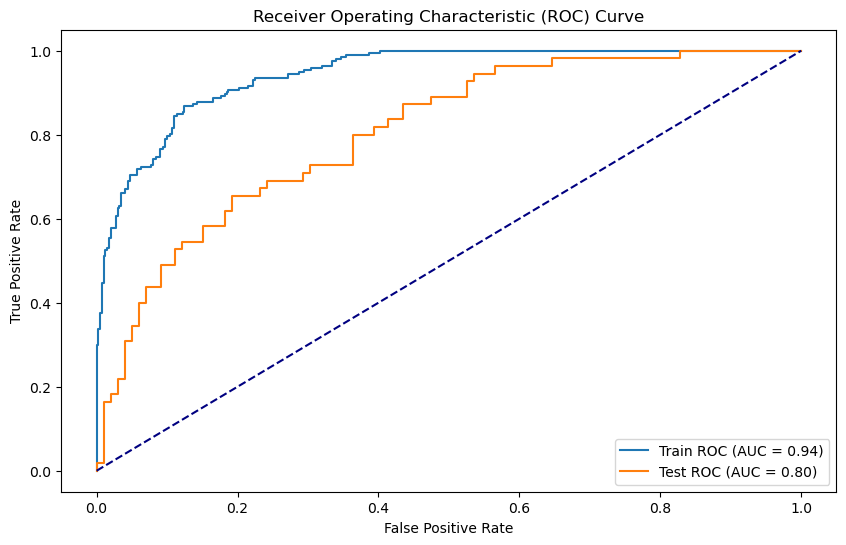

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcul des probabilités pour chaque classe
train_probs = model.predict_proba(X_train)[:, 1]
test_probs = model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calcul des AUC
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Tracé des courbes ROC
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                    Feature  Importance
0               Pregnancies        0.03
1                   Glucose        0.22
2             BloodPressure        0.08
3             SkinThickness        0.03
4                   Insulin        0.13
5                       BMI        0.15
6  DiabetesPedigreeFunction        0.27
7                       Age        0.09


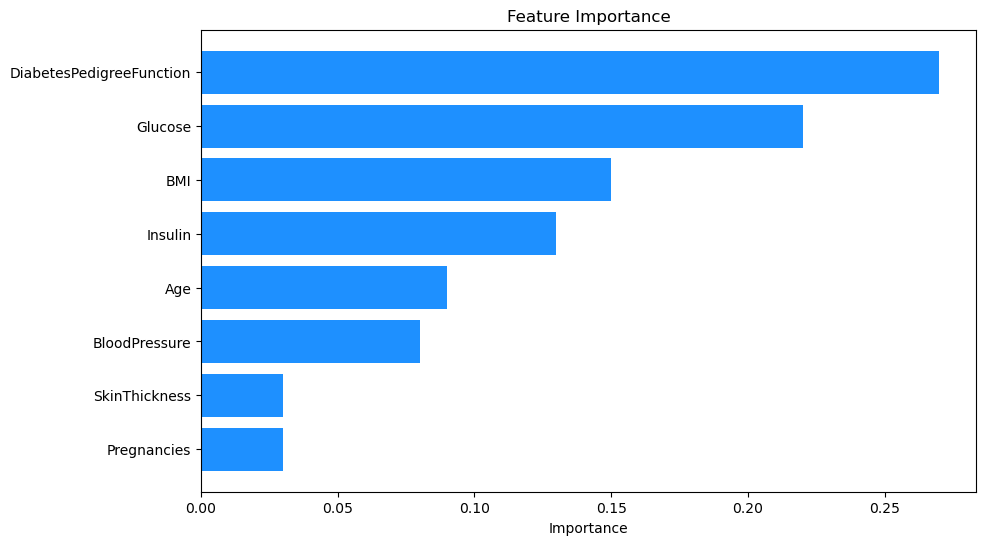

In [21]:
# Obtention de l'importance des caractéristiques
feature_importances = model.feature_importances_

# Création d'un DataFrame pour l'importance des caractéristiques
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Affichage du DataFrame
print(importance_df)

# Création du graphique pour l'importance des caractéristiques
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## Modèle avec Optimisation des paramètres



AdaBoost, pour Adaptive Boosting, est un algorithme d'apprentissage automatique qui est utilisé en conjonction avec d'autres types d'algorithmes pour améliorer leurs performances. **AdaBoost est un algorithme de boosting, qui crée un modèle fort à partir de plusieurs modèles faibles**. 

Il y a deux paramètres principaux à optimiser dans AdaBoost :

### n_estimators

Le paramètre `n_estimators` définit le nombre d'estimateurs (modèles faibles) à utiliser. Plus le nombre d'estimateurs est élevé, plus le modèle sera complexe.

Cependant, si ce nombre est trop élevé, le modèle peut devenir trop complexe et surapprendre les données, ce qui signifie qu'il sera moins capable de généraliser à de nouvelles données. En revanche, si ce nombre est trop faible, le modèle peut ne pas être assez complexe pour bien apprendre les données. C'est donc un équilibre à trouver.

### learning_rate

Le paramètre `learning_rate` contrôle à quel point chaque modèle faible tente de corriger les erreurs des modèles précédents. 

Un taux d'apprentissage plus élevé signifie que chaque modèle tente de corriger davantage les erreurs des modèles précédents, ce qui peut conduire à un modèle plus complexe et à un risque de surapprentissage.

Un taux d'apprentissage plus faible signifie que chaque modèle tente de corriger moins les erreurs des modèles précédents, ce qui peut conduire à un modèle moins complexe et à un risque de sous-apprentissage. Encore une fois, c'est un équilibre à trouver.

L'optimisation de ces paramètres est importante car elle peut grandement affecter la performance du modèle AdaBoost. C'est généralement fait en utilisant une sorte de recherche sur grille ou une recherche aléatoire, qui teste différentes combinaisons de paramètres pour trouver celle qui donne les meilleures performances sur un jeu de données de validation.


In [22]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# Création du modèle
model = AdaBoostClassifier(random_state=42)

# Définition de la grille de paramètres pour la recherche
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}

In [24]:
# Création et ajustement de GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 50}


In [25]:
# Prédiction et évaluation du modèle
best_model = grid_search.best_estimator_

# Sur l'ensemble d'entrainement
train_predictions = best_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Train Classification Report:")
print(classification_report(y_train, train_predictions))

Train Accuracy: 0.8192182410423453
Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       401
           1       0.78      0.67      0.72       213

    accuracy                           0.82       614
   macro avg       0.81      0.78      0.79       614
weighted avg       0.82      0.82      0.82       614



In [26]:
# Sur l'ensemble de test
test_predictions = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))


Test Accuracy: 0.7662337662337663
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



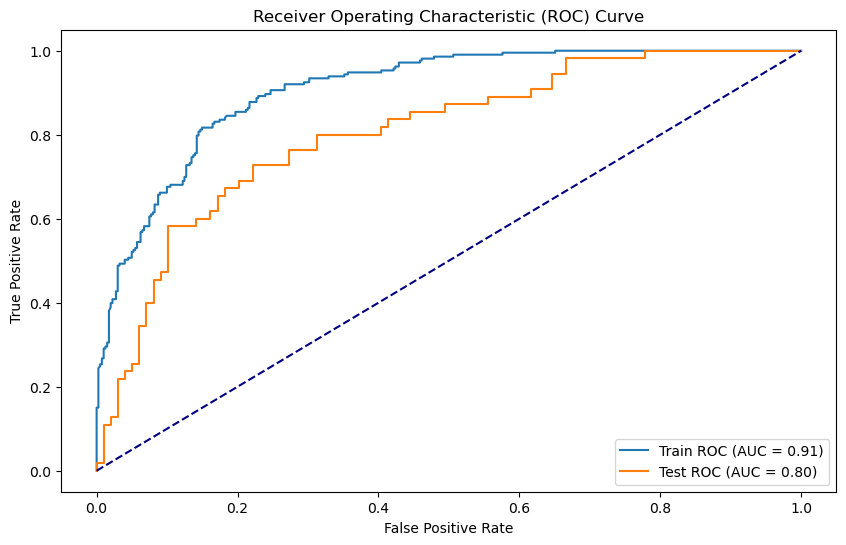

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcul des probabilités pour chaque classe
train_probs = best_model.predict_proba(X_train)[:, 1]
test_probs = best_model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calcul des AUC
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Tracé des courbes ROC
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                    Feature  Importance
0               Pregnancies        0.04
1                   Glucose        0.22
2             BloodPressure        0.08
3             SkinThickness        0.02
4                   Insulin        0.08
5                       BMI        0.16
6  DiabetesPedigreeFunction        0.18
7                       Age        0.22


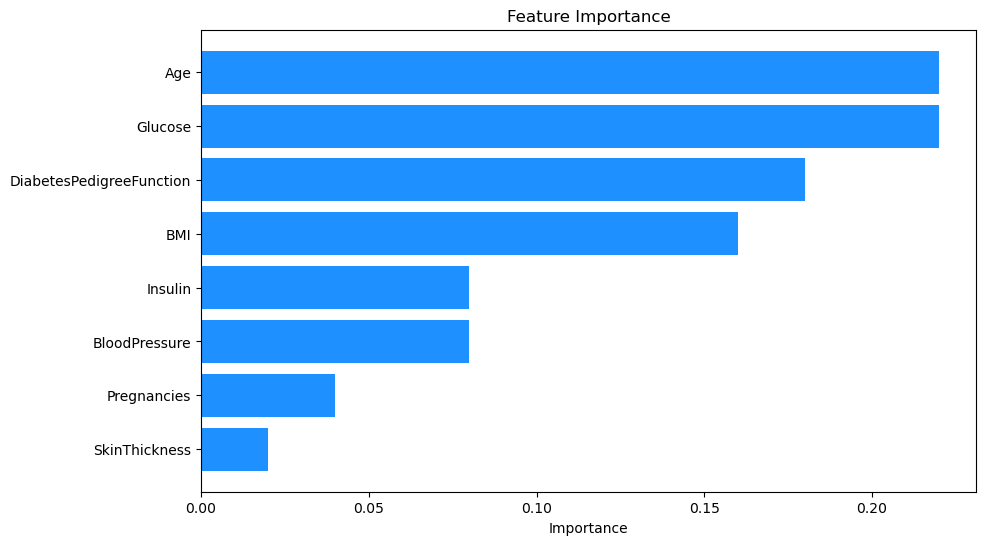

In [28]:
# Obtention de l'importance des caractéristiques
feature_importances = best_model.feature_importances_

# Création d'un DataFrame pour l'importance des caractéristiques
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Affichage du DataFrame
print(importance_df)

# Création du graphique pour l'importance des caractéristiques
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Quizz sur AdaBoost

1. Qu'est-ce qu'AdaBoost?

   - [ ] A. Un algorithme de régression
   - [ ] B. Un algorithme de classification
   - [ ] C. Un algorithme de boosting
   - [ ] D. Un algorithme de clustering

2. Quels sont les principaux paramètres à optimiser dans AdaBoost?

   - [ ] A. `n_clusters` et `max_depth`
   - [ ] B. `n_neighbors` et `weights`
   - [ ] C. `n_estimators` et `learning_rate`
   - [ ] D. `C` et `gamma`

3. Comment peut-on obtenir l'importance des variables dans un modèle AdaBoost en Python?

   - [ ] A. Avec l'attribut `coef_`
   - [ ] B. Avec l'attribut `importances_`
   - [ ] C. Avec l'attribut `feature_importances_`
   - [ ] D. Avec l'attribut `variables_`

4. Comment peut-on optimiser les paramètres dans un modèle AdaBoost en Python?

   - [ ] A. En utilisant une boucle for
   - [ ] B. En utilisant la validation croisée
   - [ ] C. En utilisant une grille de recherche
   - [ ] D. En utilisant l'optimisation par essais de particules


# XGBoost

## Préparation des données

In [ ]:
# Préparation des données
X = diabete.drop('Outcome', axis=1)
y = diabete['Outcome']

# Division des données en ensemble d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
!pip install xgboost
from xgboost import XGBClassifier


## XGBoost sans optimisation

In [29]:
# Paramétrage de l'algorithme
params = {
    'max_depth': 3,  # la profondeur maximale de chaque arbre
    'eta': 0.3,  # l'importance de chaque arbre
    'objective': 'multi:softprob',  # erreur de perte à minimiser
    'num_class': 2,  # le nombre de classes à prédire
    'n_estimators': 100  # le nombre d'arbres à construire.
}


In [32]:
# Création du modèle XGBoost
model = XGBClassifier()

# Entraînement du modèle
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
#Prédiction sur la base train et test
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report


# Prédiction sur l'ensemble de test
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Prédiction des probabilités
y_pred_proba_test = model.predict_proba(X_test)[:,1]
y_pred_proba_train = model.predict_proba(X_train)[:,1]


In [35]:
y_pred_proba_test

array([5.5601823e-01, 7.0081703e-02, 9.7442582e-02, 1.2571210e-01,
       3.5482001e-01, 9.7948974e-01, 2.4022725e-04, 9.8819900e-01,
       7.6827973e-01, 7.6601499e-01, 2.5990061e-02, 9.9509490e-01,
       7.6409467e-02, 6.0178453e-01, 5.7607889e-04, 3.8079917e-01,
       9.1599792e-02, 2.8428910e-04, 9.2614639e-01, 3.6903018e-01,
       5.2765250e-01, 1.9985759e-03, 2.7876109e-02, 1.8717288e-03,
       6.0727483e-01, 9.9335784e-01, 1.4177618e-02, 3.0932148e-04,
       1.2063966e-03, 1.0422832e-02, 9.7147018e-01, 9.3259001e-01,
       9.4224429e-01, 9.9405539e-01, 9.1838658e-01, 8.8899183e-01,
       9.9734026e-01, 5.0970042e-01, 1.2910024e-02, 9.7723514e-01,
       2.9017294e-03, 7.8532875e-02, 9.8880905e-01, 2.5146315e-01,
       1.3942107e-04, 7.2292489e-01, 5.9194237e-01, 1.0575751e-01,
       4.8898924e-02, 9.9116337e-01, 1.2032370e-04, 9.8881370e-01,
       9.7211289e-01, 1.9804281e-01, 3.4011202e-03, 8.0981763e-04,
       9.3775558e-01, 9.2919101e-04, 2.6682448e-02, 9.8075956e

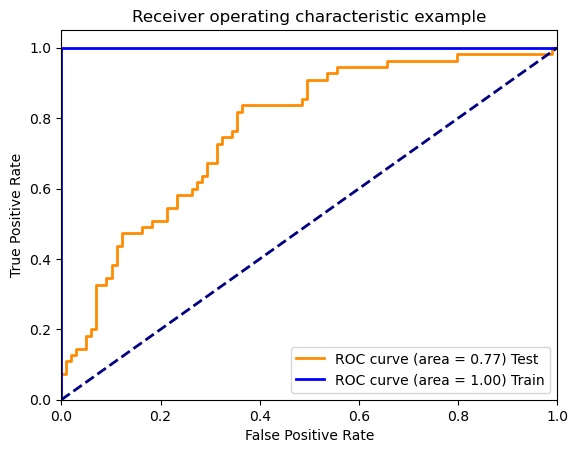

In [36]:
# Courbe ROC pour le jeu de données test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [37]:

# Rapport de classification pour l'ensemble de test
print("Rapport de classification pour l'ensemble de test :")
print(classification_report(y_test, y_pred_test))



Rapport de classification pour l'ensemble de test :
              precision    recall  f1-score   support

           0       0.79      0.71      0.74        99
           1       0.55      0.65      0.60        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.69       154



In [38]:
# Rapport de classification pour l'ensemble d'entraînement
print("Rapport de classification pour l'ensemble d'entraînement :")
print(classification_report(y_train, y_pred_train))

Rapport de classification pour l'ensemble d'entraînement :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



                    feature  importance
1                   Glucose    0.247188
5                       BMI    0.143292
7                       Age    0.139741
4                   Insulin    0.115176
3             SkinThickness    0.098815
2             BloodPressure    0.093273
6  DiabetesPedigreeFunction    0.090128
0               Pregnancies    0.072386


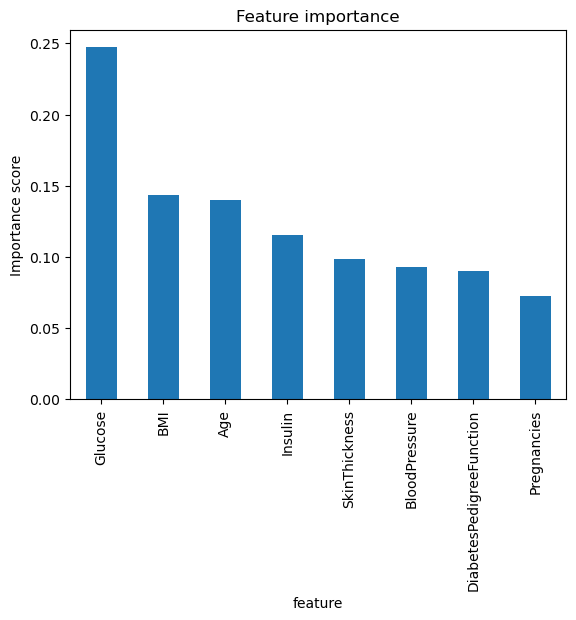

In [39]:
# Importance des variables
importance_scores = model.feature_importances_

# Création du DataFrame d'importance des variables
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance_scores
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df)

# Affichage du graphique d'importance des variables
importance_df.set_index('feature').plot(kind='bar', legend=False)
plt.title('Feature importance')
plt.ylabel('Importance score')
plt.show()

## XGBoost avec optimisation des paramètresr avec GridSearchCV

In [40]:
from sklearn.model_selection import  GridSearchCV
import time

In [41]:
# Définition des paramètres à optimiser
param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'max_depth': [3, 4, 5,7,8],
    
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'learning_rate': [0.01, 0.1, 0.2],
    
    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300,500,1000],
    
    
}

# Création de l'objet GridSearch

model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)


In [42]:
# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle avec GridSearch
grid_search.fit(X_train, y_train)

# Calcul du temps d'exécution
execution_time = time.time() - start_time



Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [43]:
# Affichage des meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

# Affichage du temps d'exécution
print("Temps d'exécution: %.2f secondes" % execution_time)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Temps d'exécution: 7.73 secondes


In [44]:

# Utilisation du meilleur modèle trouvé pour la prédiction
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [45]:
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       401
           1       0.83      0.76      0.79       213

    accuracy                           0.86       614
   macro avg       0.85      0.84      0.85       614
weighted avg       0.86      0.86      0.86       614


Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



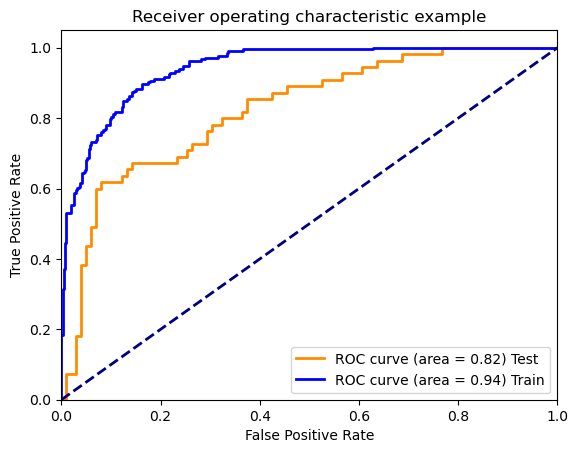

In [46]:
# Courbe ROC pour le jeu de données test
# Courbe ROC
y_train_pred_prob = best_model.predict_proba(X_train)[:,1]
y_test_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [47]:
# Importance des variables
importance_scores = best_model.feature_importances_

# Création du DataFrame d'importance des variables
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance_scores
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df)



                    feature  importance
1                   Glucose    0.304058
5                       BMI    0.175761
7                       Age    0.149131
6  DiabetesPedigreeFunction    0.087382
4                   Insulin    0.076975
3             SkinThickness    0.074665
2             BloodPressure    0.068395
0               Pregnancies    0.063632


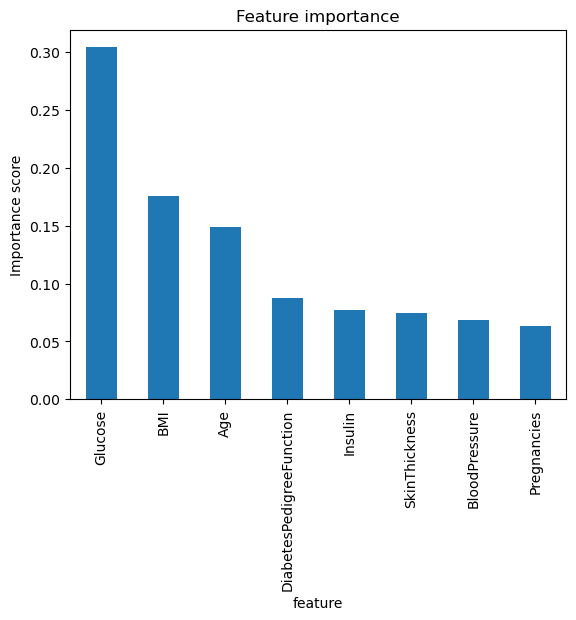

In [48]:
# Affichage du graphique d'importance des variables
importance_df.set_index('feature').plot(kind='bar', legend=False)
plt.title('Feature importance')
plt.ylabel('Importance score')
plt.show()

# Modèle lightGBM

In [ ]:
#conda install lightgbm

In [49]:

import lightgbm as lgb

## Modèle sans optimisation

In [51]:
# Initialisation du modèle LGBMClassifier
lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # type de boosting, 'gbdt' signifie Gradient Boosting Decision Tree
    objective='binary',  # fonction objectif, 'binary' indique que c'est une tâche de classification binaire
    num_leaves=31,  # nombre maximum de feuilles pour les arbres base
    learning_rate=0.05,  # taux d'apprentissage
    feature_fraction=0.9,  # fraction des colonnes à utiliser pour chaque itération, utilisée pour combattre le surapprentissage
    bagging_fraction=0.8,  # fraction des données à utiliser pour chaque itération, utilisée pour combattre le surapprentissage
    bagging_freq=5  # fréquence du bagging, utilisé conjointement avec bagging_fraction
)

In [52]:
# Entraînement du modèle
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               learning_rate=0.05, objective='binary')

In [53]:
# Prédiction
y_pred_train = lgbm_model.predict(X_train)
y_pred_test = lgbm_model.predict(X_test)

In [54]:
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       401
           1       0.93      0.93      0.93       213

    accuracy                           0.95       614
   macro avg       0.95      0.95      0.95       614
weighted avg       0.95      0.95      0.95       614


Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



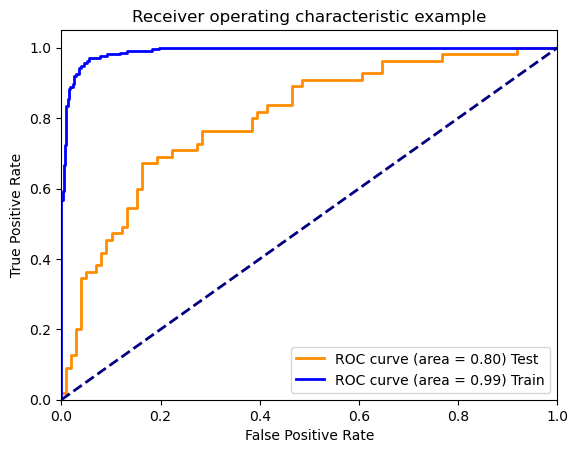

In [55]:
# Courbe ROC pour le jeu de données test
# Courbe ROC
y_train_pred_prob = lgbm_model.predict_proba(X_train)[:,1]
y_test_pred_prob = lgbm_model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



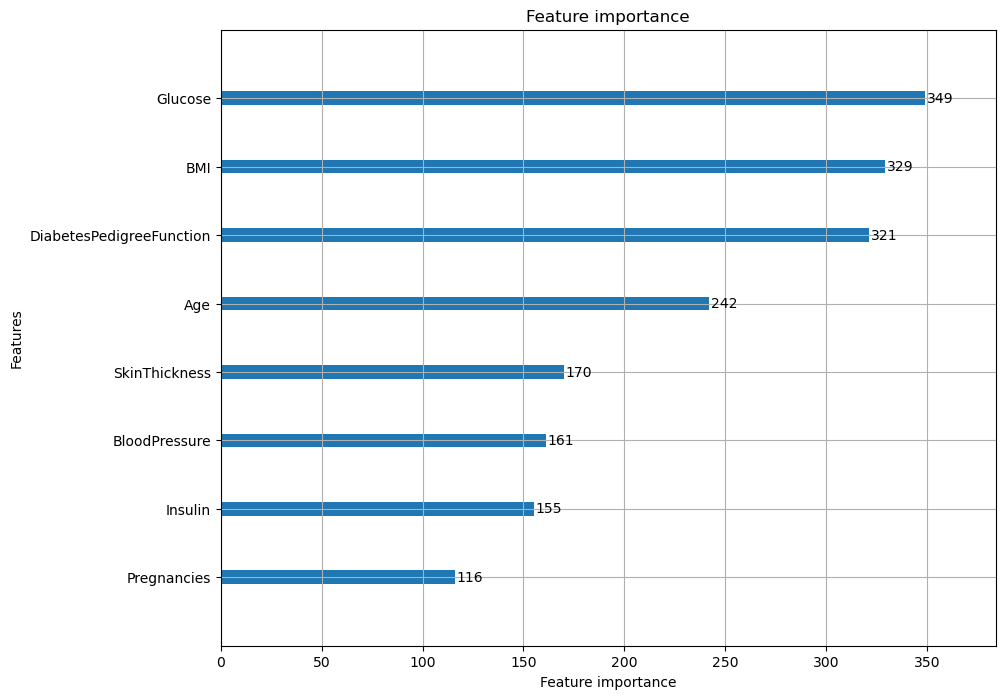

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=1000; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.1s
[CV] END .learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   0.2s
[CV] END .learning_rate=0.01, max_depth=7, n_estimators=1000; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.4s
[CV] END ...learning_rate=0.

In [56]:
# Utilisation de la fonction plot_importance pour afficher l'importance des variables
lgb.plot_importance(lgbm_model, figsize=(10, 8))
plt.show()

## Modèle avec optimisation

In [57]:
# Initialisation du modèle LGBMClassifier
lgbm_model = lgb.LGBMClassifier()

# Définition des paramètres à optimiser
params = {
    'learning_rate': [0.01, 0.1, 0.5],  # taux d'apprentissage
    'n_estimators': [20, 40, 100],  # nombre d'arbres à utiliser
    'num_leaves': [31, 50, 100]  # nombre maximum de feuilles pour les arbres base
}

# Utilisation de GridSearch pour trouver les meilleurs paramètres
grid = GridSearchCV(lgbm_model, params, cv=5)

start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

# Affichage des meilleurs paramètres trouvés
print("Best parameters found: ", grid.best_params_)

# Affichage du temps d'exécution
print("Time elapsed: ", end_time - start_time, "seconds")



Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 20, 'num_leaves': 31}
Time elapsed:  14.407773971557617 seconds


In [58]:
# Prédiction en utilisant les meilleurs paramètres

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

In [59]:
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       401
           1       0.90      0.84      0.87       213

    accuracy                           0.91       614
   macro avg       0.91      0.89      0.90       614
weighted avg       0.91      0.91      0.91       614


Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



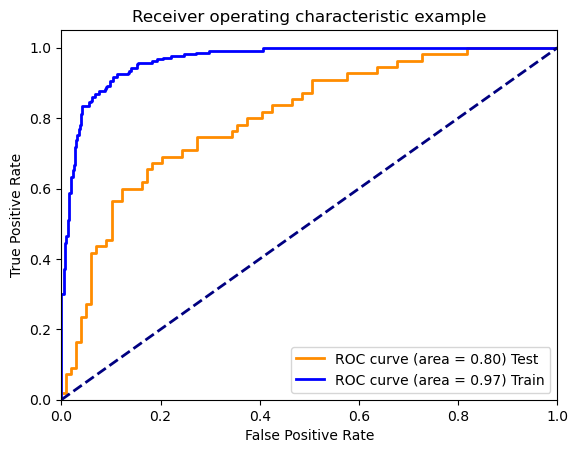

In [60]:
# Courbe ROC pour le jeu de données test
# Courbe ROC
y_train_pred_prob = grid.predict_proba(X_train)[:,1]
y_test_pred_prob = grid.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



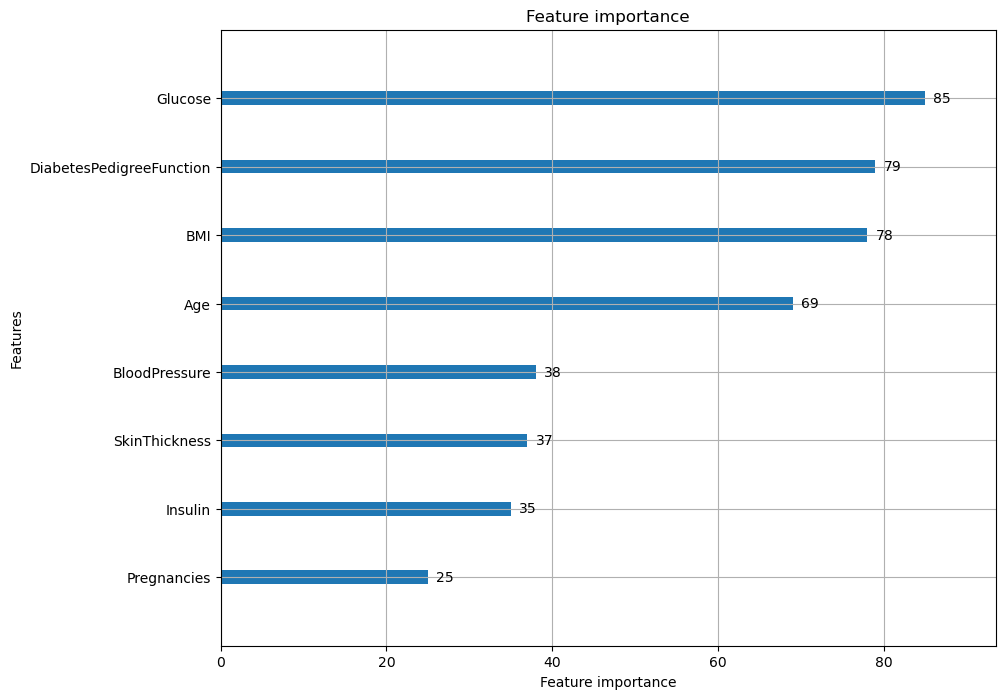

In [61]:
# Utilisation de la fonction plot_importance pour afficher l'importance des variables
lgb.plot_importance(grid.best_estimator_, figsize=(10, 8))
plt.show()

# Modele catboost

In [62]:
! pip install catboost
from catboost import CatBoostClassifier

In [63]:
model = CatBoostClassifier()
model.fit(X_train, y_train)


Learning rate set to 0.008365
0:	learn: 0.6888461	total: 60ms	remaining: 59.9s
1:	learn: 0.6852948	total: 61.6ms	remaining: 30.7s
2:	learn: 0.6814512	total: 62.8ms	remaining: 20.9s
3:	learn: 0.6771557	total: 63.9ms	remaining: 15.9s
4:	learn: 0.6737050	total: 65ms	remaining: 12.9s
5:	learn: 0.6695565	total: 66.3ms	remaining: 11s
6:	learn: 0.6653279	total: 67.5ms	remaining: 9.58s
7:	learn: 0.6615001	total: 68.8ms	remaining: 8.54s
8:	learn: 0.6573795	total: 70ms	remaining: 7.71s
9:	learn: 0.6547598	total: 70.7ms	remaining: 7s
10:	learn: 0.6506556	total: 71.8ms	remaining: 6.45s
11:	learn: 0.6475214	total: 72.8ms	remaining: 5.99s
12:	learn: 0.6444544	total: 74.1ms	remaining: 5.63s
13:	learn: 0.6408373	total: 75.1ms	remaining: 5.29s
14:	learn: 0.6379785	total: 76.2ms	remaining: 5s
15:	learn: 0.6340365	total: 77.4ms	remaining: 4.76s
16:	learn: 0.6302563	total: 78.5ms	remaining: 4.54s
17:	learn: 0.6267500	total: 80ms	remaining: 4.37s
18:	learn: 0.6241854	total: 81.8ms	remaining: 4.22s
19:	lear

In [64]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [65]:
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       401
           1       0.98      0.89      0.93       213

    accuracy                           0.96       614
   macro avg       0.96      0.94      0.95       614
weighted avg       0.96      0.96      0.96       614


Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



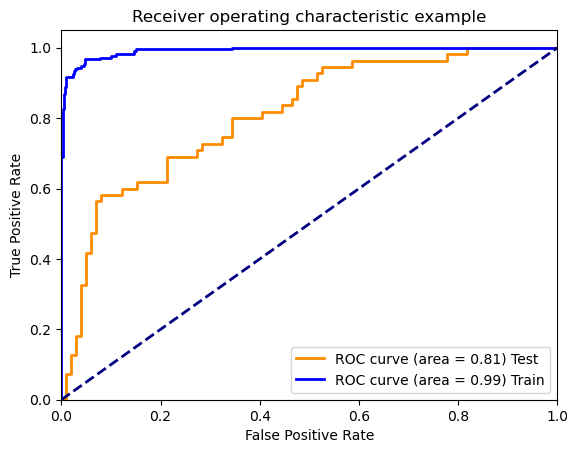

In [66]:
# Courbe ROC pour le jeu de données test
# Courbe ROC
y_train_pred_prob = model.predict_proba(X_train)[:,1]
y_test_pred_prob = model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [67]:
# Importance des variables
importance_scores = model.feature_importances_

# Création du DataFrame d'importance des variables
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance_scores
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df)



                    feature  importance
1                   Glucose   23.409233
5                       BMI   16.914786
7                       Age   15.068323
6  DiabetesPedigreeFunction   11.747311
4                   Insulin    8.807770
3             SkinThickness    8.517449
2             BloodPressure    8.454363
0               Pregnancies    7.080766


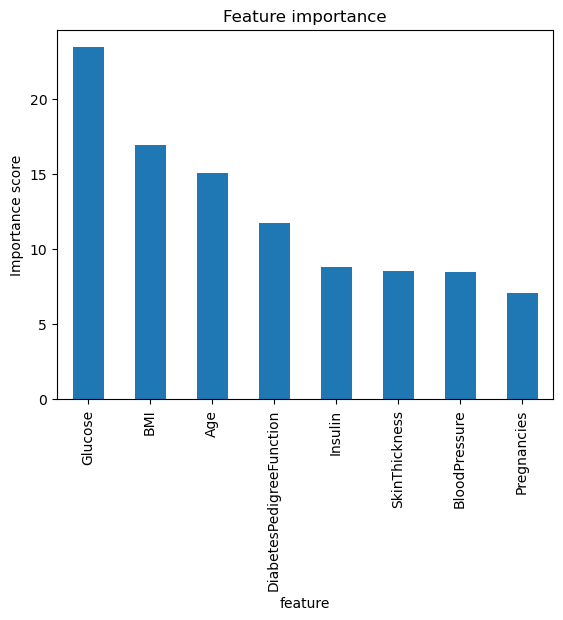

In [68]:
# Affichage du graphique d'importance des variables
importance_df.set_index('feature').plot(kind='bar', legend=False)
plt.title('Feature importance')
plt.ylabel('Importance score')
plt.show()

## Modèle avec optimisation avec GridSearchCV

In [69]:
# Définir les paramètres que vous souhaitez optimiser
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],  # Taux d'apprentissage pour le gradient boosting
    'depth': [4, 6, 8],  # Profondeur maximale de l'arbre
    'l2_leaf_reg': [1, 3, 5],  # Coefficient de régularisation L2
    'iterations': [100, 200, 300]  # Nombre d'itérations (nombre d'arbres à construire)
}
# Créer un objet CatBoostClassifier et un objet Pool pour les données
catboost = CatBoostClassifier()


In [70]:
# Créer un objet GridSearchCV avec le modèle CatBoostClassifier, les paramètres à optimiser et la métrique d'évaluation
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, scoring='accuracy', cv=5)

# Mesurer le temps d'entraînement
start_time = time.time()

# Effectuer la recherche d'hyperparamètres
grid_search.fit(X_train, y_train)

# Calculer le temps d'entraînement
training_time = time.time() - start_time

0:	learn: 0.6619233	total: 669us	remaining: 66.3ms
1:	learn: 0.6346398	total: 1.67ms	remaining: 81.7ms
2:	learn: 0.6150910	total: 2.03ms	remaining: 65.7ms
3:	learn: 0.5962212	total: 2.36ms	remaining: 56.6ms
4:	learn: 0.5786657	total: 2.75ms	remaining: 52.3ms
5:	learn: 0.5607356	total: 3.11ms	remaining: 48.7ms
6:	learn: 0.5474223	total: 3.5ms	remaining: 46.4ms
7:	learn: 0.5361906	total: 3.88ms	remaining: 44.7ms
8:	learn: 0.5242739	total: 4.22ms	remaining: 42.7ms
9:	learn: 0.5168371	total: 4.63ms	remaining: 41.6ms
10:	learn: 0.5090459	total: 5.03ms	remaining: 40.7ms
11:	learn: 0.5000805	total: 5.33ms	remaining: 39.1ms
12:	learn: 0.4933977	total: 5.66ms	remaining: 37.9ms
13:	learn: 0.4854449	total: 6.03ms	remaining: 37ms
14:	learn: 0.4812759	total: 7.15ms	remaining: 40.5ms
15:	learn: 0.4758124	total: 7.66ms	remaining: 40.2ms
16:	learn: 0.4704319	total: 8.02ms	remaining: 39.2ms
17:	learn: 0.4644147	total: 8.3ms	remaining: 37.8ms
18:	learn: 0.4607469	total: 8.55ms	remaining: 36.5ms
19:	lear

In [71]:
# Afficher les résultats
print('Best Parameters:', grid_search.best_params_)
print('Best Parameters:',training_time)

Best Parameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best Parameters: 64.46274304389954


In [72]:
# Faire des prédictions sur l'ensemble d'entraînement et l'ensemble de test en utilisant le meilleur modèle trouvé
best_model=grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [73]:
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       401
           1       0.98      0.89      0.93       213

    accuracy                           0.96       614
   macro avg       0.96      0.94      0.95       614
weighted avg       0.96      0.96      0.96       614


Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



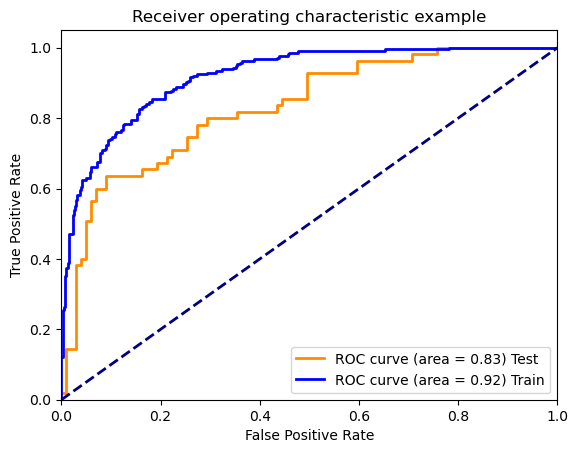

In [74]:
# Courbe ROC pour le jeu de données test
# Courbe ROC
y_train_pred_prob = best_model.predict_proba(X_train)[:,1]
y_test_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [75]:
# Importance des variables
importance_scores = best_model.feature_importances_

# Création du DataFrame d'importance des variables
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance_scores
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df)



                    feature  importance
1                   Glucose   34.780684
7                       Age   20.051516
5                       BMI   18.872921
6  DiabetesPedigreeFunction    9.100029
4                   Insulin    6.224739
2             BloodPressure    4.268457
3             SkinThickness    3.725653
0               Pregnancies    2.976001


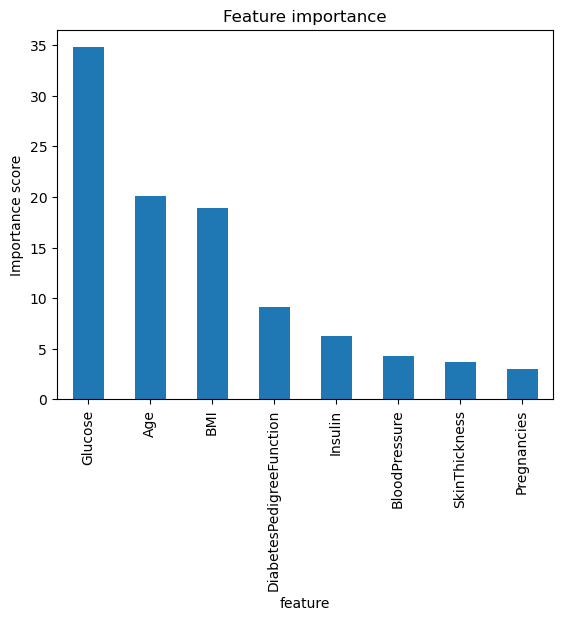

In [76]:
# Affichage du graphique d'importance des variables
importance_df.set_index('feature').plot(kind='bar', legend=False)
plt.title('Feature importance')
plt.ylabel('Importance score')
plt.show()